In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir("/content/drive/MyDrive/Lung-Colon Cancer ")
!pwd


/content/drive/MyDrive/Lung-Colon Cancer 


In [3]:
#!unzip /content/drive/MyDrive/Lung-Colon Cancer.zip \
#-d /content/drive/MyDrive/Lung-Colon Cancer

In [4]:
#!unzip -q "/content/drive/MyDrive/Lung-Colon Cancer /lung_colon_image_set (1).zip" -d "/content/drive/MyDrive/Lung-Colon Cancer "


In [5]:
path_dataset="/content/drive/MyDrive/Lung-Colon Cancer "


In [6]:
filepath=[]
lable=[]

folds=os.listdir(path_dataset)
print(folds)

for fold in folds :
  fold_path=os.path.join(path_dataset,fold)
  flist=os.listdir(fold_path)
  print(flist)

  for f in flist:
    f_path=os.path.join(fold_path,f)
    filelist=os.listdir(f_path)
    print(filelist)

    for file in filelist:
      fpath = os.path.join(f_path,file)
      filepath.append(fpath)



      if f=='colon_aca':
        lable.append('Colon Adenocarcinoma')

      elif f=='colon_n':
        lable.append('Colon Benign Tissue')

      elif f=='lung_aca':
        lable.append('Lung Adenocarcinoma')

      elif f == 'lung_n':
                lable.append('Lung Benign Tissue')

      elif f == 'lung_scc':
                lable.append('Lung Squamous Cell Carcinoma')







['colon_image_sets', 'lung_image_sets']
['colon_aca', 'colon_n']
['colonca4547.jpeg', 'colonca4569.jpeg', 'colonca4648.jpeg', 'colonca4545.jpeg', 'colonca4632.jpeg', 'colonca4681.jpeg', 'colonca4614.jpeg', 'colonca463.jpeg', 'colonca4570.jpeg', 'colonca4687.jpeg', 'colonca4633.jpeg', 'colonca4656.jpeg', 'colonca4609.jpeg', 'colonca4525.jpeg', 'colonca4553.jpeg', 'colonca4605.jpeg', 'colonca4580.jpeg', 'colonca4563.jpeg', 'colonca4683.jpeg', 'colonca4558.jpeg', 'colonca4589.jpeg', 'colonca455.jpeg', 'colonca4631.jpeg', 'colonca4574.jpeg', 'colonca467.jpeg', 'colonca4557.jpeg', 'colonca4630.jpeg', 'colonca4541.jpeg', 'colonca4562.jpeg', 'colonca4610.jpeg', 'colonca4538.jpeg', 'colonca459.jpeg', 'colonca4667.jpeg', 'colonca4599.jpeg', 'colonca4658.jpeg', 'colonca4612.jpeg', 'colonca4664.jpeg', 'colonca4534.jpeg', 'colonca4524.jpeg', 'colonca462.jpeg', 'colonca4666.jpeg', 'colonca4606.jpeg', 'colonca4518.jpeg', 'colonca4560.jpeg', 'colonca4575.jpeg', 'colonca452.jpeg', 'colonca4585.jpeg', 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [8]:
fserise=pd.Series(filepath,name="filepath")
lseries=pd.Series(lable,name="lable")

data=pd.concat([fserise,lseries],axis=1)
data.head(10)


,filepath,lable
0,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
1,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
2,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
3,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
4,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
5,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
6,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
7,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
8,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma
9,/content/drive/MyDrive/Lung-Colon Cancer /colo...,Colon Adenocarcinoma


In [9]:
data.shape

(25000, 2)

In [10]:
data["lable"].value_counts()

,count
lable,
Colon Adenocarcinoma,5000
Colon Benign Tissue,5000
Lung Adenocarcinoma,5000
Lung Benign Tissue,5000
Lung Squamous Cell Carcinoma,5000


In [11]:
#split data into training,test,validation
strat=data["lable"]

train_data,dummay_data=train_test_split(data,shuffle=True,train_size=0.8,random_state=99,stratify=strat)

strat=dummay_data["lable"]

test_data,valid_data=train_test_split(dummay_data,shuffle=True,test_size=0.5,random_state=99,stratify=strat)

In [12]:
batch_size=64
img_size=(224,224)
channel=3
img_shape=(img_size[0],img_size[1],channel)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator()
test_gen=ImageDataGenerator()

In [14]:
train_gen=train_gen.flow_from_dataframe(train_data,x_col="filepath",y_col="lable",target_size=img_size,class_mode="categorical",
                                        shuffle=True,color_mode="rgb",batch_size=batch_size)


valid_gen=test_gen.flow_from_dataframe(valid_data,x_col="filepath",y_col="lable",target_size=img_size,class_mode="categorical",
                                        shuffle=True,color_mode="rgb",batch_size=batch_size)


test_gen=test_gen.flow_from_dataframe(test_data,x_col="filepath",y_col="lable",target_size=img_size,class_mode="categorical",
                                        shuffle=True,color_mode="rgb",batch_size=batch_size)



Found 20000 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.
Found 2500 validated image filenames belonging to 5 classes.


In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
t_gen=train_gen.class_indices
classes=list(t_gen.keys())


images,lable=next(train_gen)

plt.figure(figsize=(20,20))


for i in range(16):
  plt.subplot(4,4,i+1)
  image=images[i]/255
  plt.imshow(image)
  index=np.argmax(lable[i])
  classname=classes[index]
  plt.title(classname,color="blue",fontsize=12)
  plt.axis("off")

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam ,Adamax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow import keras






In [18]:
img_size=(224,244)
channel=3
image_shape=(img_size[0],img_size[1],channel)

num_classes=len(list((train_gen.class_indices.keys())))


model=Sequential([
    Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=image_shape),
    Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    Conv2D(filters=128,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPooling2D((2,2)),

    Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
    Conv2D(filters=256,kernel_size=(3,3),padding="same",activation="relu"),
    MaxPooling2D((2,2)),


    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256,activation="relu"),
    Dense(256,activation="relu"),
    Dense(num_classes,activation="softmax")


])

model.compile(Adamax(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
epochs=15
history=model.fit(x=train_gen,epochs=epochs,verbose=1,validation_data=test_gen,validation_steps=None,shuffle=False)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 6171s 19s/step - accuracy: 0.5430 - loss: 3.0161 - val_accuracy: 0.8948 - val_loss: 0.2763
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 303s 966ms/step - accuracy: 0.9073 - loss: 0.2472 - val_accuracy: 0.9144 - val_loss: 0.2181
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 302s 963ms/step - accuracy: 0.9425 - loss: 0.1520 - val_accuracy: 0.9632 - val_loss: 0.1037
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 303s 966ms/step - accuracy: 0.9526 - loss: 0.1223 - val_accuracy: 0.9648 - val_loss: 0.0947
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 303s 965ms/step - accuracy: 0.9697 - loss: 0.0809 - val_accuracy: 0.9576 - val_loss: 0.1109
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 302s 965ms/step - accuracy: 0.9709 - loss: 0.0783 - val_accuracy: 0.9808 - val_loss: 0.0593
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 302s 965ms/step - accuracy: 0.9730 - loss: 0.0719 - val_accuracy: 0.9152 - val_loss: 0.2466
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 302s 965ms/step - accuracy: 0.9757 - 

In [20]:
train_accuracy=history.history["accuracy"]
train_loss=history.history["loss"]

validation_accuracy=history.history["val_accuracy"]
validation_loss=history.history["val_loss"]

index_for_valid=np.argmin(validation_loss)
lowest_loss_valid=validation_loss[index_for_valid]

index_for_accuracy=np.argmax(validation_accuracy)
highest_accuracy=validation_accuracy[index_for_accuracy]

epochs=[1+x for x in range(len(train_accuracy))]

best_epoch_loss=f"best epoch{str(index_for_valid+1)}"
best_epoch_acc=f"best epoch{str(index_for_accuracy+1)}"




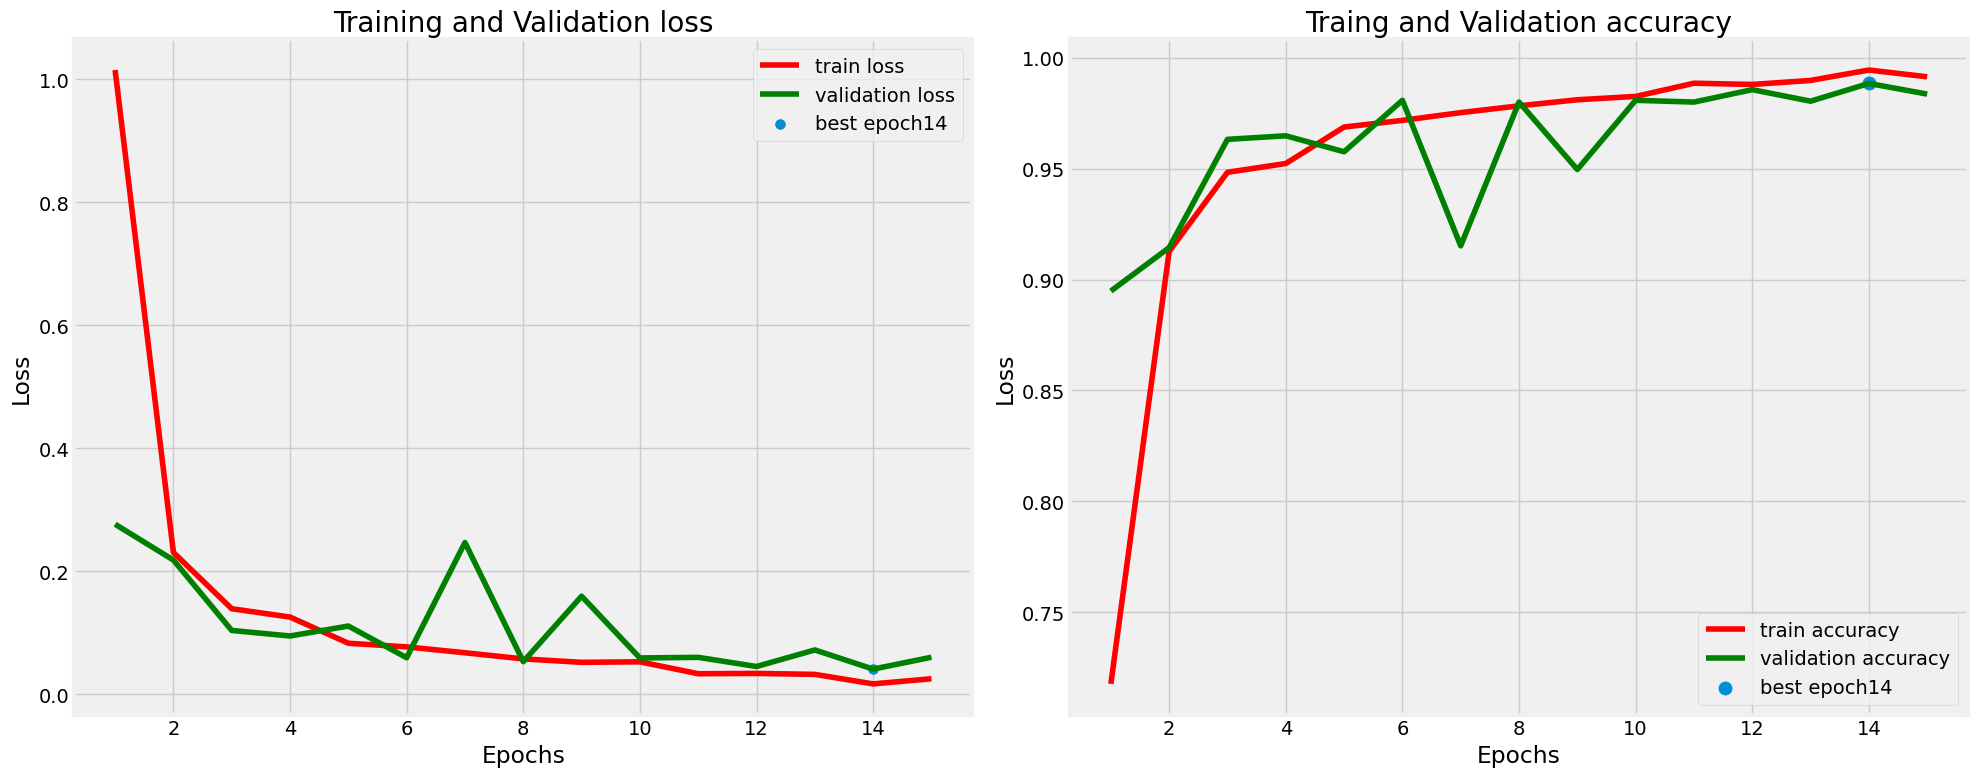

In [21]:
plt.figure(figsize=(20,8))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
plt.plot(epochs,train_loss,"r",label="train loss")
plt.plot(epochs,validation_loss,"g",label="validation loss")
plt.scatter(index_for_valid+1,lowest_loss_valid,s=50,label=best_epoch_loss)
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()




plt.subplot(1,2,2)
plt.plot(epochs,train_accuracy,"r",label="train accuracy")
plt.plot(epochs,validation_accuracy,"g",label="validation accuracy")
plt.scatter(index_for_accuracy+1,highest_accuracy,s=90,label=best_epoch_acc)
plt.title("Traing and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


plt.tight_layout()

plt.show()

In [22]:
train_step=train_gen.samples//train_gen.batch_size
valid_step=valid_gen.samples//valid_gen.batch_size
test_step=test_gen.samples//test_gen.batch_size


train_score=model.evaluate(train_gen,steps=train_step,verbose=1)
valid_score=model.evaluate(valid_gen,steps=valid_step,verbose=1)
test_score=model.evaluate(test_gen,steps=test_step,verbose=1)


print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

312/312 ━━━━━━━━━━━━━━━━━━━━ 152s 485ms/step - accuracy: 0.9938 - loss: 0.0178


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 628s 16s/step - accuracy: 0.9863 - loss: 0.0364
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 484ms/step - accuracy: 0.9833 - loss: 0.0588
Train Loss:  0.017498701810836792
Train Accuracy:  0.9940905570983887
--------------------
Valid Loss:  0.0360807329416275
Valid Accuracy:  0.9871794581413269
--------------------
Test Loss:  0.06018596515059471
Test Accuracy:  0.9835737347602844


In [29]:
test_gen.reset()

y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

print(classification_report(test_gen.classes, y_pred))

40/40 ━━━━━━━━━━━━━━━━━━━━ 19s 464ms/step
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       500
           1       0.97      1.00      0.99       500
           2       0.96      0.98      0.97       500
           3       1.00      1.00      1.00       500
           4       0.98      0.97      0.97       500

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 488ms/step


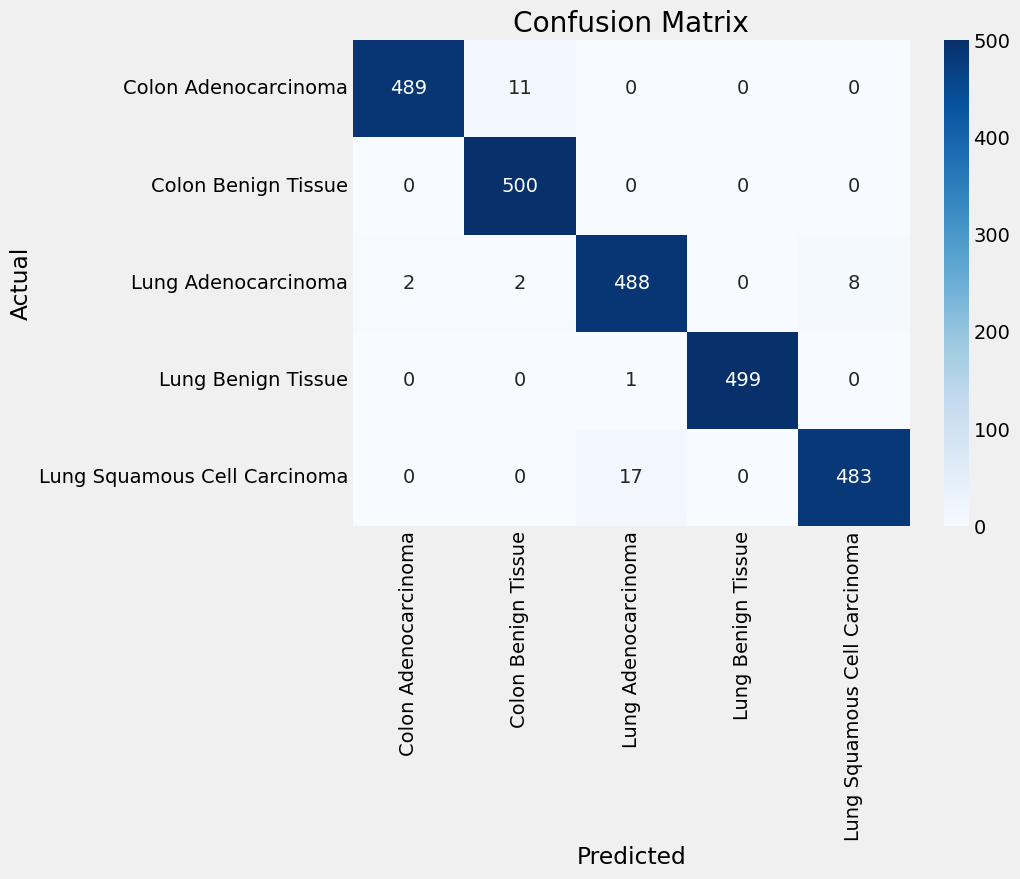

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

test_gen.reset()

y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_gen.class_indices.keys(),
            yticklabels=test_gen.class_indices.keys())

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save('Model.h5')
